# Analisis exploratorio de datos


Comenzemos importando las librerias

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

Leemos el archivo luego del proceso de etl

In [43]:
data = pd.read_csv('data/peliculas_ETL.csv', low_memory=False)
df = data.copy()
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42196 entries, 0 to 42195
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     42196 non-null  int64  
 1   belongs_to_collection  42196 non-null  object 
 2   budget                 42196 non-null  float64
 3   genres                 42196 non-null  object 
 4   original_language      42196 non-null  object 
 5   overview               42196 non-null  object 
 6   popularity             42196 non-null  float64
 7   production_companies   42196 non-null  object 
 8   production_countries   42196 non-null  object 
 9   release_date           42196 non-null  object 
 10  revenue                42196 non-null  float64
 11  runtime                42196 non-null  float64
 12  spoken_languages       42196 non-null  object 
 13  status                 42196 non-null  object 
 14  tagline                42196 non-null  object 
 15  ti

Creamos un dataframe con los valores a analizar

In [44]:

df = df[['id', 'title', 'vote_count', 'vote_average']].copy()
df.shape

(42196, 4)

In [45]:
df.describe()

,id,vote_count,vote_average
count,42196.000000,42196.000000,42196.000000
mean,106669.904896,109.391720,5.631261
std,111704.740881,489.341742,1.921395
min,2.000000,0.000000,0.000000
25%,25792.000000,3.000000,5.000000
50%,58390.500000,10.000000,6.000000
75%,152939.250000,35.000000,6.800000
max,469172.000000,14075.000000,10.000000


Vamos a eliminar los valores nulos para analizar las distribuciones de nuestras variables numericas

In [46]:
df2 = df.drop(df[df["vote_average"] == 0].index)
df_EDA = df2.drop(df2[df2["vote_count"] == 0].index)
df_EDA

,id,title,vote_count,vote_average
0,862,Toy Story,5415.0,7.7
1,8844,Jumanji,2413.0,6.9
2,15602,Grumpier Old Men,92.0,6.5
3,31357,Waiting to Exhale,34.0,6.1
4,11862,Father of the Bride Part II,173.0,5.7
...,...,...,...,...
42189,84419,House of Horrors,8.0,6.3
42190,390959,Shadow of the Blair Witch,2.0,7.0
42191,289923,The Burkittsville 7,1.0,7.0
42192,222848,Caged Heat 3000,1.0,3.5


Observamos que nos quedan 39440 peliculas, hagamos un pequeño analisis a esto.

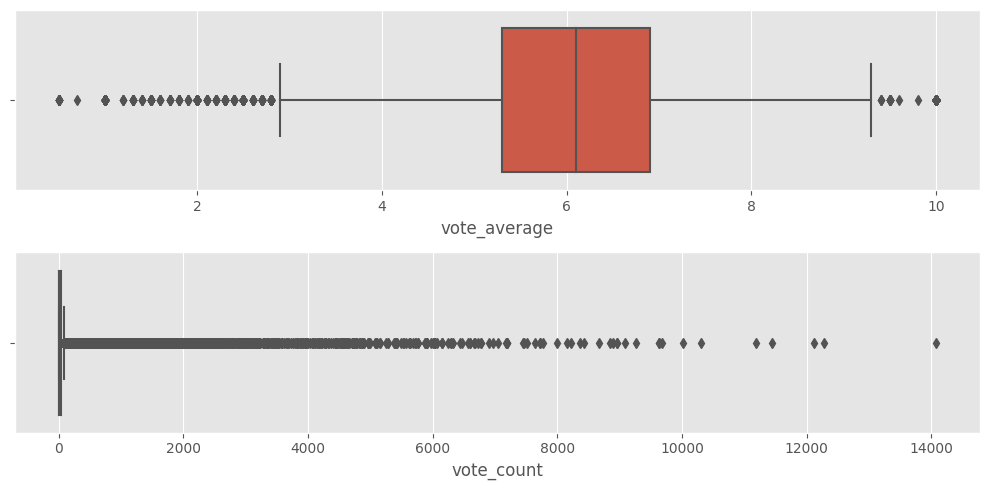

In [47]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))
sns.boxplot(x=df_EDA['vote_average'], ax=axs[0])
sns.boxplot(x=df_EDA['vote_count'], ax=axs[1])

plt.tight_layout()
plt.show()

Podemos observar que hay una gran cantidad de peliculas con muy pocas vistas, pongamos un umbral para que sea real.

Chequeemos las peliculas que tienen mas de 1000 votos.

In [48]:

df_EDA['vote_count'] = df_EDA['vote_count'].apply(lambda x: x if x > 500 else None)
df_EDA = df_EDA.dropna()
df_EDA.shape

(1888, 4)

Wow!, solo 1030 peliculas tienen mas de 1000 votos!, okey veamos cuales son las distribuciones ahora.

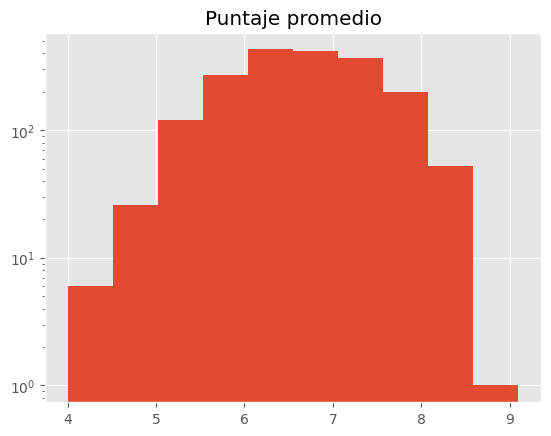

In [49]:
plt.hist(df_EDA['vote_average'], log= True)
plt.title('Puntaje promedio')
plt.show()

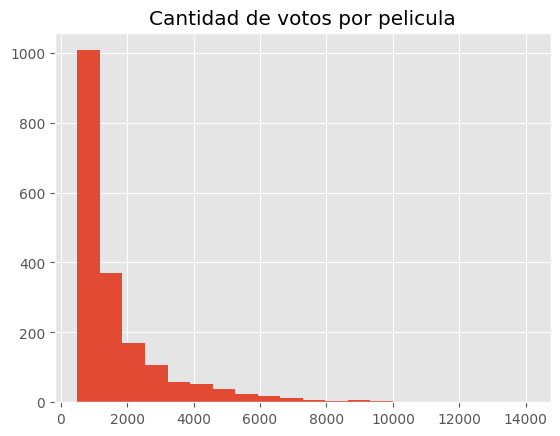

In [50]:
df_EDA['vote_count'].hist(bins=20)
plt.title('Cantidad de votos por pelicula')
plt.show()

Vemos que tienen una distribucion un poco mas legibles, veamos los outliers

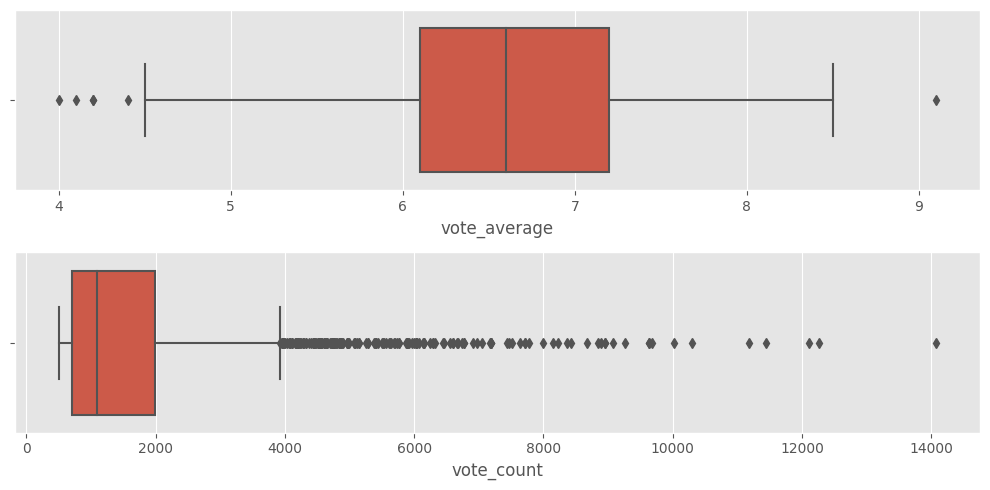

In [51]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))
sns.boxplot(x=df_EDA['vote_average'], ax=axs[0])
sns.boxplot(x=df_EDA['vote_count'], ax=axs[1])

plt.tight_layout()
plt.show()

Ahora que mejoramos un poco el estado de nuestro dataset podemos analizar un poco las peliculas.

In [52]:
df_EDA = df_EDA.sort_values(by=['vote_average', 'vote_count'], ascending=False)
print(f'pelicula con mas votos y puntaje: {df_EDA.iloc[0, 1]}')
print(f'pelicula con menos votos y puntaje: {df_EDA.iloc[-1, 1]}')

pelicula con mas votos y puntaje: Dilwale Dulhania Le Jayenge
pelicula con menos votos y puntaje: Jack and Jill


In [53]:
top_10_df = df_EDA.sort_values(by=['vote_average', 'vote_count'], ascending=False).head(10)

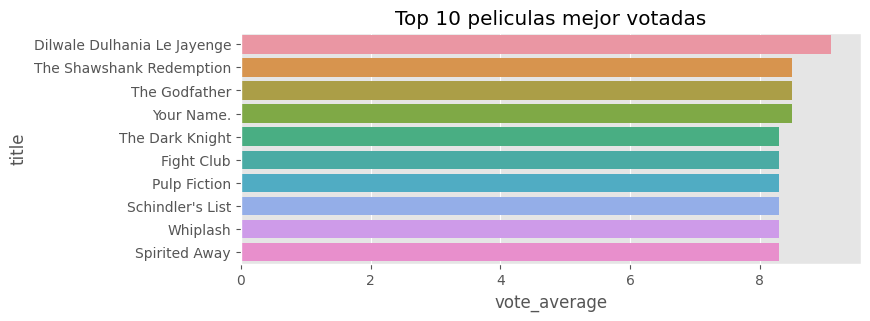

In [54]:
fig = plt.figure(figsize=(8, 3))
sns.barplot(data=top_10_df,y='title', x='vote_average')
plt.title('Top 10 peliculas mejor votadas')
plt.show()

Seria interesante averiguar los 10 generos mas frecuentes, vamos a ello.

In [55]:
generos = pd.read_csv('data/generos_dummies')
generos.drop(columns='Unnamed: 0', inplace=True)
df_generos = pd.merge(generos, df, how='inner', on='id')
df_generos.shape

(16323, 24)

In [56]:
df_solo_generos = df_generos[['Animation', 'Comedy', 'Family', 'Adventure', 'Fantasy', 'Romance',
       'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'History',
       'Science Fiction', 'Mystery', 'War', 'Foreign', 'Music', 'Documentary',
       'Western', 'TV Movie']].copy()
top_10_generos = df_solo_generos.sum().sort_values(ascending=False)
y = list(top_10_generos.values)
x = list(top_10_generos.index)

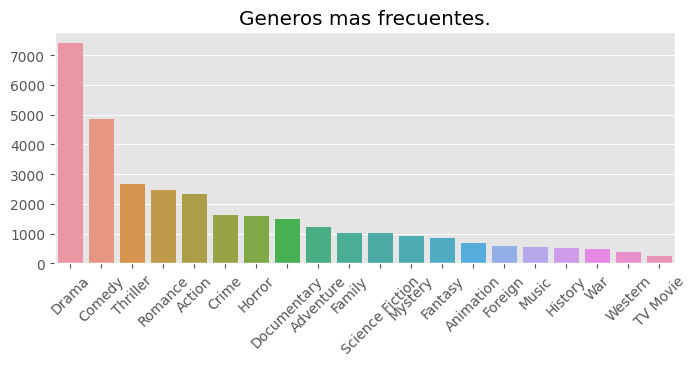

In [57]:
fig = plt.figure(figsize=(8,3))
sns.barplot(y=y, x=x)
plt.title('Generos mas frecuentes.')
plt.xticks(rotation=45)
plt.show()

In [58]:
df_overview = data[['overview', 'id']]
df_ml = pd.merge(df_EDA, df_overview, on='id')
df_ml.shape

(1888, 5)

In [59]:
df_ml.to_csv('data/df_ml.csv')